In [3]:
import pandas as pd
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt



In [9]:
# Load and preprocess the training data
data_al_spectre_path = r"C:\Users\Asus\Desktop\Projet_ALUM\Al_Spectre_tr.xlsx"
data_al_spectre = pd.read_excel(data_al_spectre_path)
data_al_spectre.columns = data_al_spectre.columns.astype(str)

# Prepare training features and target
X = data_al_spectre.iloc[:, 1:].drop(columns=['Mg'])
y = data_al_spectre['Mg']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
print(X)
print(y)

      0    1    2    3    4    5    6    7    8    9  ...  2006  2007  2008  \
0   179  182  184  191  199  204  208  211  213  217  ...   818   809   808   
1   179  184  186  189  194  204  210  207  205  207  ...   830   823   823   
2    86   92   97  101  104  112  116  113  116  119  ...   831   824   820   
3    88   92   96  100  105  112  115  116  121  125  ...   822   816   813   
4   132  140  142  146  153  158  158  160  163  166  ...   817   809   806   
5   133  137  142  147  152  158  162  165  169  173  ...   829   822   814   
6   126  133  136  139  143  152  153  153  152  155  ...   838   830   827   
7   156  159  160  164  169  179  186  190  195  198  ...   823   822   816   
8    82   88   90   96  106  114  117  115  113  114  ...   871   861   857   
9   104  108  115  121  121  124  129  134  134  135  ...   802   803   802   
10  199  204  209  208  212  221  228  226  226  230  ...   814   807   807   
11  233  236  238  242  244  247  251  257  263  264

In [10]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train PLS Regression Model
pls = PLSRegression(n_components=20)
pls.fit(X_train, y_train)

# Predict and evaluate on the test set
y_pred = pls.predict(X_test)
y_pred2 = pls.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse}")
print(f"R²: {r2}")


RMSE: 0.05191769240615165
R²: 0.9974373910372161


In [ ]:
param_grid = {'n_components': range(1, 21)}

# Initialize the PLS regression model
pls = PLSRegression()

# Perform grid search with cross-validation to find the best number of components
grid_search = GridSearchCV(estimator=pls, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Get the best number of components found by grid search
best_n_components = grid_search.best_params_['n_components']

print("Best Number of Components:", best_n_components)


In [4]:
# Define the range of random state values
random_states = range(100)

best_params = None
best_score = -float('inf')  # Initialize with negative infinity

for random_state in random_states:
    # Split data into training and testing sets with different random states
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=random_state)

    # Train PLS Regression Model
    pls = PLSRegression(n_components=20)
    pls.fit(X_train, y_train)

    # Predict and evaluate on the test set
    y_pred = pls.predict(X_test)
    
    
    r2 = r2_score(y_test, y_pred)

    # Check if the current random state gives a better score
    if r2 > best_score:
        best_score = r2
        best_params = {'random_state': random_state}

print("Best Parameters:", best_params)

Best Parameters: {'random_state': 42}


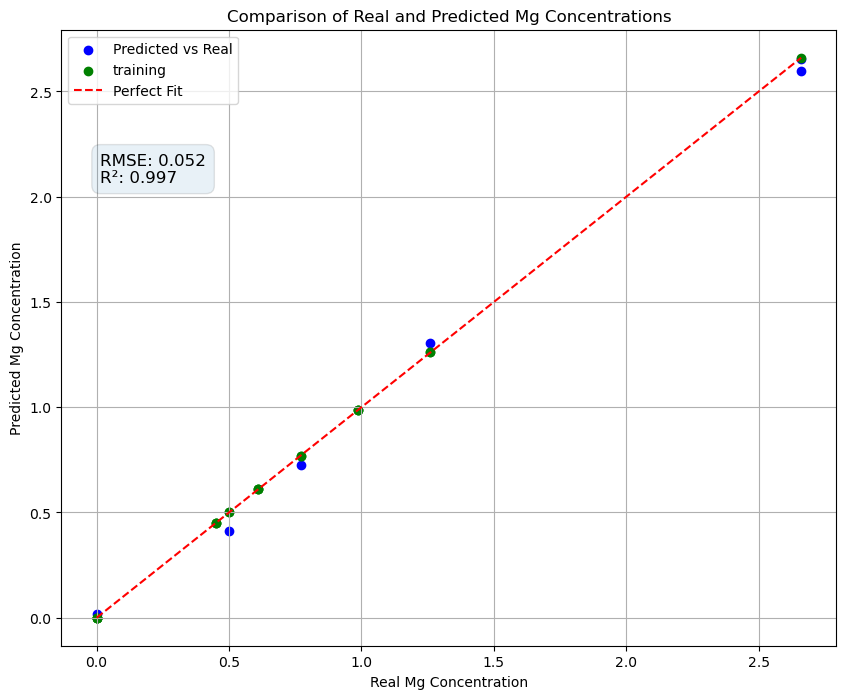

In [11]:
# Visualization
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Real')  
plt.scatter(y_train, y_pred2, color='green', label='training')  
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', label='Perfect Fit')
plt.text(x=0.05, y=0.8, s=f'RMSE: {rmse:.3f}\nR²: {r2:.3f}', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', alpha=0.1))

plt.xlabel('Real Mg Concentration')
plt.ylabel('Predicted Mg Concentration')
plt.title('Comparison of Real and Predicted Mg Concentrations')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
# Load the test data
data_test_path = r"C:\Users\Asus\Desktop\Projet_ALUM\test.xlsx"
data_test = pd.read_excel(data_test_path)
data_test.columns = data_test.columns.astype(str)

# Normalize the test features using the same scaler as in training
X_test_scaled = scaler.transform(data_test)

# Predict Mg concentration
y_pred = pls.predict(X_test_scaled)
predicted_mg = y_pred.flatten()[0]

# Define the aluminium types
mg_concentration_dict = {
    '3004': 1.26, '3005': 0.45, '3105': 0.5, '5454': 2.66, '6061': 0.985,
    '6111': 0.77, '6351': 0.61, '413': 0.0001
}

# Find the aluminium type
def find_aluminium_type(predicted_mg, mg_dict, tolerance=0.04):
    for key, value in mg_dict.items():
        if abs(value - predicted_mg) < tolerance:
            return key
    return "Inconnu"

predicted_type = find_aluminium_type(predicted_mg, mg_concentration_dict, tolerance=0.04)

# Print the predicted Mg concentration and the aluminium type
print(f"Concentration prédite de Mg : {predicted_mg}")
print(f"Type d'aluminium prédit: {predicted_type}")


Concentration prédite de Mg : 0.7699999999999997
Type d'aluminium prédit: 6111
